In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Classificaion

In [116]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [117]:
x, y = iris.data, iris.target
x.shape, y.shape

((150, 4), (150,))

In [118]:
x2 = x[:,:2]   # first two columns (sepal length, sepal width)

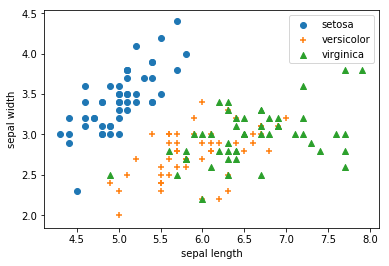

In [119]:
markers = ['o','+','^']
for i in range(3):
    xs = x2[:,0][y==i]
    ys = x2[:,1][y==i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [120]:
y2 = y.copy()
y2[y==2] = 1    # y가 2인 경우는 y를 1로 assign
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [121]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x2,y2,test_size=0.2)
x_train.shape, x_test.shape

((120, 2), (30, 2))

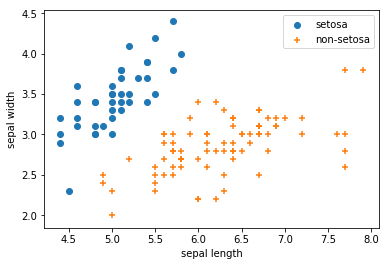

In [122]:
markers = ['o','+','^']
for i in range(3):
    xs = x_train[:,0][y_train==i]
    ys = x_train[:,1][y_train==i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(['setosa','non-setosa'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [123]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000)
clf.fit(x_train, y_train)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
clf.coef_, clf.intercept_

(array([[ 25.24814255, -17.69436111]]), array([-76.95580664]))

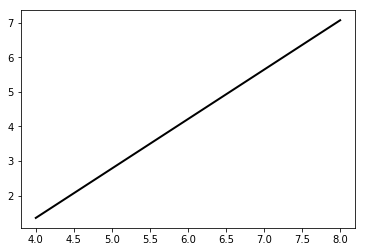

In [125]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
xx = np.linspace(4,8,40)
plt.plot(xx, (-a/b)*xx - c/b, 'k-', linewidth=2)

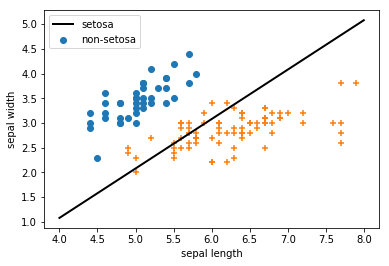

In [126]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
xx = np.linspace(4,8,40)
plt.plot(xx, -a/b+xx - c/b, 'k-', linewidth=2)

markers = ['o','+','^']
for i in range(3):
    xs = x_train[:,0][y_train==i]
    ys = x_train[:,1][y_train==i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(['setosa','non-setosa'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [127]:
clf.predict([[4.5,3.5]])

array([0])

In [128]:
clf.score(x_test, y_test)

1.0

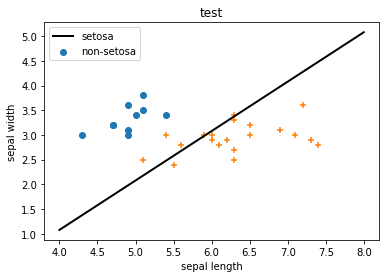

In [129]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
xx = np.linspace(4,8,40)
plt.plot(xx, -a/b+xx - c/b, 'k-', linewidth=2)

markers = ['o','+','^']
for i in range(3):
    xs = x_test[:,0][y_test==i]
    ys = x_test[:,1][y_test==i]
    plt.scatter(xs, ys, marker=markers[i])
plt.title("test")
plt.legend(['setosa','non-setosa'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [130]:
# dataset이 충분치 않음 -> KFold() 사용하고 싶음
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True)
score = cross_val_score(SGDClassifier(), x2, y2, cv=cv)
print(score, score.mean())

[0.66666667 0.96666667 0.96666667 0.9        1.        ] 0.9


/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

In [131]:
# 4개 모든 속성을 사용
# 꽃 종류 3개로 구분

iris = load_iris()
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2
                                                   )

In [132]:
clf_all = SGDClassifier()
clf_all.fit(x_train, y_train)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [133]:
clf_all.score(x_test, y_test)

0.8333333333333334

In [134]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(SGDClassifier(), x, y, cv=cv)
print(scores, scores.mean())

[0.43333333 0.6        0.66666667 0.66666667 0.93333333] 0.6599999999999999


/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

In [135]:
from sklearn import metrics

metrics.confusion_matrix(y_test, clf_all.predict(x_test))

array([[11,  0,  0],
       [ 1,  3,  4],
       [ 0,  0, 11]])